In [ ]:
import numpy as np                                   # импорт numpy
import pandas as pd                                  # импорт pandas
from google.colab import files                       # нужно для импорта своего csv файла
import matplotlib.pyplot as plt                      # нужно для рисования графиков
from sklearn import datasets                         # импорт модуля датасетов
from sklearn.metrics import accuracy_score           # импорт ф-ии для нахождения точности
from sklearn.model_selection import train_test_split # разделение датасетов
from sklearn import svm                              # импорт модуля svm из библиотеки sklearn
from sklearn.svm import SVC                          # импорт модуля svc из библиотеки sklearn
from sklearn.linear_model import LogisticRegression  # импорт метода логистической регрессии
from sklearn.utils import Bunch
# импорт для создания экземпляров Bunch, которые используются для хранения данных датасета

In [ ]:
#Здесь нужно будет импортировать ваш файл
from google.colab import files
uploaded = files.upload()
ar_data = pd.read_csv('file.csv') # Чтение csv файла
My_array = ar_data.to_numpy()  # Перевод из csv в массив numpy



Saving Урюпкина.csv to Урюпкина.csv


In [ ]:
#приводим датасэт к склерновской структуре.
dataset = Bunch()
dataset.data = My_array[:, 1:3] #под данные выделяем 2 и 3 столбцы
dataset.target = My_array[:,-1] #метки отправляются в метки
dataset.DESCR = ".. Ur_dataset:\n\n dataset" # Название датасета
dataset

{'data': array([[4.18858549, 5.95620025],
        [5.0662922 , 5.2491191 ],
        [7.16966472, 2.41148207],
        [4.82156616, 3.02297828],
        [0.56060452, 8.42497269],
        [0.63179061, 4.68214065],
        [5.20457127, 6.2090002 ],
        [5.73723923, 2.26081041],
        [7.08614594, 1.34496642],
        [4.84781685, 0.04001828],
        [3.33601383, 6.93474273],
        [1.68692257, 2.45366995],
        [2.39410223, 9.15864942],
        [6.00062565, 7.31446793],
        [0.14813185, 5.84787423],
        [2.37006078, 8.14560441],
        [8.55129453, 6.38462249],
        [3.13888546, 7.06387213],
        [6.03670423, 1.40101718],
        [4.36390097, 5.93873883],
        [2.74964722, 6.67514586],
        [1.48087405, 6.59732917],
        [7.41322237, 4.97002271],
        [9.42423207, 4.14857815],
        [8.85584978, 2.73909768],
        [3.71453301, 0.10944526],
        [7.25108038, 3.99125958],
        [1.30465357, 2.72635085],
        [3.33669517, 7.03869295],
      

Первое задание

In [ ]:
class BinVectorMethod:
  def __init__(self):
    # Инициализация весов и смещения нулем
    self.weight = 0 #веса/твектор определяющий разделяющую поверхность
    self.bias = 0 #смещение

  def fit(self, x, y):
    num_samples, num_features = x.shape
    class1 = x[y == 1]  # Первый класс
    class2 = x[y == -1]  # Второй класс

    # Выбор случайных точек из классов
    dot1 = class1[np.random.choice(len(class1), 1)][0]
    dot2 = class2[np.random.choice(len(class2), 1)][0]

    x1, y1 = dot1
    x2, y2 = dot2




    # Первоначальное уравнение гиперплоскости

    #вычисляем нормаль вектора гиперплоскости. Она равна разнице координат первой и второй точки по каждой оси
    self.weight = np.array([(y2-y1), -(x2- x1)])
    #Чтобы вычислить скалярное произведение массивов numpy nd,
    # используем функцию numpy.dot() в Python.Она принимает в качестве аргументов
    # два массива numpy, вычисляет их скалярное произведение и возвращает результат
    #А нормаль гиперплоскости вычисляется через скалярное произведение вектора и dot1
    self.bias = -np.dot(self.weight, dot1)#находим наш вектор нормали

    #Запускаем цикл работающий, пока не будет найдено точное расположение гиперплоскости

    while True:
      holder= []#корзиночка для неправельно классифицированых точек

      #проверяем растояние от точки до гиперплоскости
      for xi, yi in zip(x,y):
        #<w,x> = 0 - область на которой модель не знает какой класс выбрать. А меньше нуля соответственно второй наш класс
        if yi * (np.dot(self.weight, xi)+ self.bias)<=0:
          #если точка неправильно классифицированна отправляем ее в корзину
          holder.append((xi,yi))
          #если точка класс. верно, выходим из цикла:
      if not holder:
        break

      # Выбор точки с наименьшим отступом
      xi,yi = holder[0]
      #linalg.norm для вычисления одной из восьми различных матричных норм или векторных норм.
      #Она возвращает норму данной матрицы или вектора.
      #чем ближе точка к разделяющей, тем неуверенее ее классификация
      sh_distance = np.abs(np.dot(self.weight, xi)+self.bias)/ np.linalg.norm(self.weight)#вычисляем расстояние от точки до прямой. Чем больше <w, x[i]>, тем дальше объект от разделяющей гиперплоскости
      #проходимся по остальным точкам из корзины
      for dots, labels in holder[1:]:
        #вычисляем растояние до гиперплоскости
        distance = np.abs(np.dot(self.weight, dots)+self.bias)/ np.linalg.norm(self.weight)
        #если оно меньше короткого , то обновляем самое короткое растояние
        if distance < sh_distance:
          sh_distance = distance
          xi, yi= dots, labels #и обновляем точку с меткой
#Рассчитаем новое уравнение гиперплоскости на основе
      self.weight = self.weight + yi * xi #обновляем вектор
      self.bias = self.bias + yi #и смещение


  def predict(self, x):
     # Предсказание меток классов для входных данных
    #с помощью знака скалярного произведения с учетом смещения
    return np.sign(np.dot(x, self.weight)+self.bias)

  def plot(self, x, y):
        # Построение графика точек данных и границы решения
        x0, y0 = np.meshgrid(np.arange(x[:, 0].min() - 1, x[:, 0].max() + 1, 0.01),
                             np.arange(x[:, 1].min() - 1, x[:, 1].max() + 1, 0.01))

        at_once = self.predict(np.c_[x0.ravel(), y0.ravel()])

        plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color="red", label="First class")
        plt.scatter(x[y == -1][:, 0], x[y == -1][:, 1], color="blue", label="Second class")

        plt.contour(x0, y0, at_once.reshape(x0.shape), colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles='-')

        plt.title('Первое задание')
        plt.xlabel('Первый признак')
        plt.ylabel('Второй признак')
        plt.legend()
        plt.show()



Функция потерь $l(\mathbf{w}) = \frac{1}{n} \sum_{i=1}^{n} (1 - y_i(\mathbf{w} \cdot \mathbf{x}_i + b))^2$, где $\mathbf{w}$ - веса, $\mathbf{x}_i$ - признаки, $y_i$ - целевая переменная, $b$ - смещение (bias), $n$ - количество наблюдений, представляет собой среднеквадратичную ошибку (Mean Squared Error, MSE), используемую в методе градиентного спуска для оптимизации параметров модели.

Чтобы найти производные функции потерь по весам $\mathbf{w}$ и смещению $b$ для использования в градиентном спуске, возьмем частные производные по $\mathbf{w}$ и $b$:

$\frac{\partial l}{\partial \mathbf{w}}$ = $\frac{2}{n} \sum_{i=1}^{n} -y_i \mathbf{x}_i (1 - y_i(\mathbf{w} \cdot \mathbf{x}_i + b))$


$
\frac{\partial l}{\partial b} = \frac{2}{n} \sum_{i=1}^{n} -y_i (1 - y_i(\mathbf{w} \cdot \mathbf{x}_i + b))
$

Эти производные можно использовать в методе градиентного спуска для обновления параметров $( \mathbf{w} )$ и $( b )$, двигаясь в направлении, обеспечивающем уменьшение функции потерь.


Для обновления параметров в градиентном спуске используются формулы:

$\mathbf{w}_{новый} = \mathbf{w}_{старый} - \alpha \frac{\partial l}{\partial \mathbf{w}}$

$b_{новый} = b_{старый} - \alpha \frac{\partial l}{\partial b}$

где $( \alpha )$ - скорость обучения (learning rate), определяющая размер шага в направлении антиградиента функции потерь.

w: веса - это параметры модели, которые мы оптимизируем. Они умножаются на признаки xi и используются для предсказания значений yi. Цель градиентного спуска - найти значения весов, при которых функция потерь минимальна.

xi: признаки - это значения, которые используются для предсказания целевой переменной. У каждого наблюдения может быть несколько признаков, и они умножаются на соответствующие веса для получения предсказанного значения.

yi: целевая переменная - это фактическое значение, которое мы пытаемся предсказать с помощью модели. Она может быть числовой или категориальной.

b: смещение (bias) - это дополнительный параметр модели, который вносит смещение в предсказания. Он добавляется к линейной комбинации весов и признаков для получения предсказанного значения.

n: количество наблюдений - это число образцов данных, которые у нас есть для обучения модели. Оно определяет размер выборки, на основе которой мы вычисляем среднеквадратичную ошибку.

Чтобы использовать градиентный спуск для оптимизации параметров модели, мы вычисляем частные производные функции потерь по весам w и смещению b. Эти производные указывают направление, в котором нужно сдвинуть значения весов и смещения, чтобы уменьшить функцию потерь и улучшить качество модели.

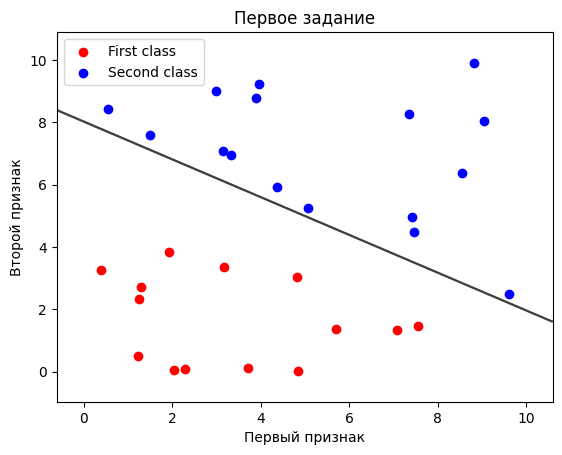

Correct in  100.0 %


In [ ]:
data = dataset
#разделим данные на тестовые и тренировочные с соотношением 30/70
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7)
bvm = BinVectorMethod()
bvm.fit(x_train,y_train)
bvm.plot(x_test,y_test)
accuracy = accuracy_score(y_test, bvm.predict(x_test))*100
print("Correct in ", round(accuracy,3),"%")



Задание2

In [ ]:
def Uriupkina_data():
 dataset = Bunch()
 dataset.data = My_array[:, 1:3] #под данные выделяем 2 и 3 столбцы
 dataset.target = My_array[:,-1] #метки отправляются в метки
 dataset.DESCR = ".. Ur_dataset:\n\n dataset" # Название датасета
 return dataset

In [ ]:
data_mass = [datasets.load_breast_cancer, datasets.load_iris, datasets.load_wine, datasets.load_digits, Uriupkina_data]
kernels = ["linear", "poly", "rbf","sigmoid"]#массив нвзваний
for sets in data_mass:
  data = sets()
  print("Название датасета: ",data.DESCR.splitlines()[2],"\n")# атрибут DESCR содержит описание датасета
  # Разделение на обучающий и тестовый наборы
  X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size = 0.7)

  best_kernel = None #лучшее ядро будет здесь
  best_accuracy = 0.0 #лучшая точность
  accuracy_arr = len(kernels)*[0] # Массив всех значений точности
  a = 0 #счетчик
  best =0 #бести результат в датасэте
  for i in kernels: # Цикл прогона по 3 ядрам
    obj = SVC(kernel = i, C = 1000)# Создаю объект SVC для классификации методом опорных векторов с использованием определённого ядра и параметра регуляризации C = 1000
    obj.fit(X_train,y_train) # Обучение модели по тренировочным значениям
    pred = obj.predict(X_test)# Предсказание на тестовом наборе
    round_acc = round(accuracy_score(y_test, pred)*100,3)# Оценка точности
    accuracy_arr[a] = round_acc # Заношу точность в массив всех точностей датасета
    a +=1#ползем по массиву
    print(" Kernel ", i, " accuracy ",round_acc)#Вывод точности при определённом ядре
    if round_acc > best:
      best = round_acc
      best_kernel= i
  print("The best result in dataset: ", best, " The first kernel: ", best_kernel)#последний вывод







Название датасета:  Breast cancer wisconsin (diagnostic) dataset 

 Kernel  linear  accuracy  94.737
 Kernel  poly  accuracy  94.737
 Kernel  rbf  accuracy  96.491
 Kernel  sigmoid  accuracy  40.936
The best result in dataset:  96.491  The first kernel:  rbf
Название датасета:  Iris plants dataset 

 Kernel  linear  accuracy  93.333
 Kernel  poly  accuracy  93.333
 Kernel  rbf  accuracy  93.333
 Kernel  sigmoid  accuracy  6.667
The best result in dataset:  93.333  The first kernel:  linear
Название датасета:  Wine recognition dataset 

 Kernel  linear  accuracy  100.0
 Kernel  poly  accuracy  81.481
 Kernel  rbf  accuracy  90.741
 Kernel  sigmoid  accuracy  7.407
The best result in dataset:  100.0  The first kernel:  linear
Название датасета:  Optical recognition of handwritten digits dataset 

 Kernel  linear  accuracy  97.593
 Kernel  poly  accuracy  98.889
 Kernel  rbf  accuracy  99.259
 Kernel  sigmoid  accuracy  77.963
The best result in dataset:  99.259  The first kernel:  rbf
На

Третье задание

In [ ]:
datasets_mass = [datasets.load_breast_cancer, datasets.load_iris, datasets.load_wine, datasets.load_digits, Uriupkina_data]
solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"] # решающие алгоритмы
for sets in datasets_mass:                                   # Цикл прогона по 4 датасетам
  data = sets()                                                # Присвоение данных определённого датасета
  print("Dataset name: ",data.DESCR.splitlines()[2],"\n")
  # Разделение на обучающий и тестовый наборы
  X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size = 0.7)
  best_solver = None
  accuracy_arr = len(solvers)*[0]# Массив всех значений точности
  a = 0
  best =0
  for i in solvers:
    lr_obj = LogisticRegression(solver = i, max_iter = 6500)
    lr_obj.fit(X_train,y_train)# Обучение модели по тренировочным значениям
    accuracy = accuracy_score(y_test, lr_obj.predict(X_test)) * 100 #точность попадания в нужный класс
    round_accuracy = round(accuracy,3)#массив точностей
    accuracy_arr[a] = round_accuracy
    a +=1  #следующий пункт массива
    print("Logistic Regression ", i, "accuracy ",round_accuracy, "%")
    # цикл по определению лучшей точности
    if round_accuracy > best:
      best = round_accuracy
      best_solver = i
  print("The best result in dataset: ", best, " The first solver: ", best_solver)

#тоже что и во втором, только с помощью логистической регрессии.


Dataset name:  Breast cancer wisconsin (diagnostic) dataset 

Logistic Regression  lbfgs accuracy  95.322 %
Logistic Regression  liblinear accuracy  93.567 %
Logistic Regression  newton-cg accuracy  95.322 %
Logistic Regression  newton-cholesky accuracy  95.322 %
Logistic Regression  sag accuracy  92.982 %
Logistic Regression  saga accuracy  92.982 %
The best result in dataset:  95.322  The first solver:  lbfgs
Dataset name:  Iris plants dataset 

Logistic Regression  lbfgs accuracy  97.778 %
Logistic Regression  liblinear accuracy  100.0 %
Logistic Regression  newton-cg accuracy  97.778 %
Logistic Regression  newton-cholesky accuracy  95.556 %
Logistic Regression  sag accuracy  97.778 %
Logistic Regression  saga accuracy  97.778 %
The best result in dataset:  100.0  The first solver:  liblinear
Dataset name:  Wine recognition dataset 

Logistic Regression  lbfgs accuracy  92.593 %
Logistic Regression  liblinear accuracy  96.296 %
Logistic Regression  newton-cg accuracy  92.593 %
Logis